*Author:*  
**Ella Pournezhad**  
  
*Description:*   
**Air Pollution Data is being cleansed, processed and analysed in this code.**  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Functions Defining:

In [2]:
# Define custom aggregation functions
def custom_mean(x):
    return x.mean()

def custom_min(x):
    return x.min()

def custom_max(x):
    return x.max()

In [3]:
def drop_status_column(df):
    for column in df.columns:
        if column.startswith('Status'):
            df.drop(columns=[column], inplace=True)

In [4]:
def merge_dataframes(dataframes):
    '''This function merges multiple dataframes'''
    merged_df = pd.concat(dataframes, ignore_index=True, sort=False)
    return merged_df

In [5]:
def add_station_name(df, file_name):
    ''' This function extracts station name from file name and adds it in StationName column'''
    station_name = file_name.split('/')[-1].split(' ')[1:-1]  # Extracting words between first and last in file name
    station_name = ' '.join(station_name)
    station_name = station_name.replace("'", "")
    df.insert(2, "StationName", station_name)

In [6]:
def read_and_add_station_name(file_path):
    df = pd.read_csv(file_path)
    add_station_name(df, file_path)
    return df

In [7]:
def convert_to_float(df, columns):
    for column in columns:
        df[column] = df[column].astype(float)

In [8]:
def remove_rows_with_negative_values(df, pollutant_columns):
    ''' This function removes rows with negative value for one pollutant.'''
    mask = df[pollutant_columns] < 0
    rows_with_negative_values = mask.any(axis=1)
    df_cleaned = df[~rows_with_negative_values]
    return df_cleaned

In [9]:
def split_dataframe_by_date(df, date_column, split_date):
    """ Split a DataFrame into two based on a given value for a date column."""
    df[date_column] = pd.to_datetime(df[date_column])  # Convert to datetime if not already
    df_before = df[df[date_column] < split_date]
    df_after = df[df[date_column] >= split_date]
    return df_before, df_after

### Loading Data Files:

In the original data files downloaded from the site (????? site must be added ?????)  
there were some extra rows **outside the table** which were removed manually.

In [10]:
df1_path = "AP data - changed/Bristol Centre 2004-2006.csv"
df2_path = "AP data - changed/Bristol Temple Way 2018-2024.csv"
df3_path = "AP data - changed/Bristol Old Market 2004-2013.csv"
df4_path = "AP data - changed/Bristol St Paul's 2007-2024.csv"

In [11]:
# Loading data and adding StationName to each dataframe
df1 = read_and_add_station_name(df1_path)
df2 = read_and_add_station_name(df2_path)
df3 = read_and_add_station_name(df3_path)
df4 = read_and_add_station_name(df4_path)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9468\3136336549.py:2: DtypeWarning: Columns (17,19,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


### Preprocessing Data:

In [12]:
# Dropping 'Status' columns if they exist
drop_status_column(df1)
drop_status_column(df2)
drop_status_column(df3)
drop_status_column(df4)

df1.info()  
df2.info()  
df3.info()  
df4.info()  

In [13]:
# Merging dataframes
merged_df = merge_dataframes([df1, df2, df3, df4])

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293478 entries, 0 to 293477
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   Date                                        293475 non-null  object
 1   Time                                        293474 non-null  object
 2   StationName                                 293478 non-null  object
 3   Ozone                                       163992 non-null  object
 4   Nitric oxide                                293474 non-null  object
 5   Nitrogen dioxide                            293474 non-null  object
 6   Nitrogen oxides as nitrogen dioxide         293474 non-null  object
 7   Sulphur dioxide                             163992 non-null  object
 8   Carbon monoxide                             239976 non-null  object
 9   PM10 particulate matter (Hourly measured)   217490 non-null  object
 10  Modelled

In [15]:
# importing into CSV
merged_df.to_csv('AP data - merged.csv' , index= False)

### Data Cleansing:

In [16]:
df_clean = merged_df

In [17]:
# Changing 'No data' values into valid NaN
df_clean = df_clean.replace('No data	', np.NaN)
df_clean = df_clean.replace('No data', np.NaN)

In [18]:
# Sorting Data
df_clean = df_clean.sort_values(by=['Date', 'Time', 'StationName'])
df_clean = df_clean.reset_index(drop=True)

In [19]:
# Converting Date column into valid datetime type
df_clean['Date2'] = pd.to_datetime(df_clean['Date'], format='%m/%d/%Y', errors='coerce')

In [20]:
# Removing rows with invalid dates
df_clean['Date'] = df_clean['Date2']
df_clean = df_clean.dropna(subset=['Date'])
df_clean.drop(columns=['Date2'], inplace= True)

In [21]:
# Defining list of pollutant columns and wind columns and all columns

all_columns = ['Ozone', 'Nitric oxide', 'Nitrogen dioxide', 
                 'Nitrogen oxides as nitrogen dioxide', 
                 'Sulphur dioxide', 'Carbon monoxide', 
                 'PM10 particulate matter (Hourly measured)',
                 'Modelled Wind Direction', 'Modelled Wind Speed',
                 'Modelled Temperature',
                 'Non-volatile PM10 (Hourly measured)',
                 'Volatile PM10 (Hourly measured)',
                 'PM2.5 particulate matter (Hourly measured)',
                 'Non-volatile PM2.5 (Hourly measured)',
                 'Volatile PM2.5 (Hourly measured)']

pollutants = ['Ozone', 'Nitric oxide', 'Nitrogen dioxide', 
                 'Nitrogen oxides as nitrogen dioxide', 
                 'Sulphur dioxide', 'Carbon monoxide', 
                 'PM10 particulate matter (Hourly measured)',
                 'Non-volatile PM10 (Hourly measured)',
                 'Volatile PM10 (Hourly measured)',
                 'PM2.5 particulate matter (Hourly measured)',
                 'Non-volatile PM2.5 (Hourly measured)',
                 'Volatile PM2.5 (Hourly measured)'] #12

Nitrogen_pollutants = ['Nitric oxide', 'Nitrogen dioxide', 'Nitrogen oxides as nitrogen dioxide']

PM_pollutants = ['PM10 particulate matter (Hourly measured)',
                 'Non-volatile PM10 (Hourly measured)',
                 'Volatile PM10 (Hourly measured)',
                 'PM2.5 particulate matter (Hourly measured)',
                 'Non-volatile PM2.5 (Hourly measured)',
                 'Volatile PM2.5 (Hourly measured)']

Other_pollutants = ['Ozone', 'Sulphur dioxide', 'Carbon monoxide']

Winds = ['Modelled Wind Direction', 'Modelled Wind Speed', 'Modelled Temperature']

stations = df_clean['StationName'].unique()

In [22]:
# Changing Datatypes
convert_to_float(df_clean, all_columns)

In [23]:
# Removing rows with negative value pollutants
df_clean = remove_rows_with_negative_values(df_clean, pollutants)

In [24]:
df_clean.describe()

,Date,Ozone,Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Sulphur dioxide,Carbon monoxide,PM10 particulate matter (Hourly measured),Modelled Wind Direction,Modelled Wind Speed,Modelled Temperature,Non-volatile PM10 (Hourly measured),Volatile PM10 (Hourly measured),PM2.5 particulate matter (Hourly measured),Non-volatile PM2.5 (Hourly measured),Volatile PM2.5 (Hourly measured)
count,279761,143480.000000,270238.000000,263035.000000,263034.000000,58468.000000,120875.000000,187617.000000,46969.000000,46969.000000,46969.000000,86821.000000,86814.000000,106864.000000,72542.000000,72542.000000
mean,2014-01-28 05:35:47.471591680,44.321060,30.235513,36.825850,81.231178,2.419751,0.422890,19.160492,195.661675,4.795753,9.674556,15.284098,3.602358,12.038296,9.951749,3.629247
min,2004-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008-09-28 00:00:00,26.000000,2.272295,15.045235,19.408898,0.000000,0.200000,10.700000,124.100000,2.900000,6.000000,8.000000,1.600000,5.600000,4.000000,2.000000
50%,2013-01-24 00:00:00,46.000000,7.000000,29.000000,40.000000,3.000000,0.300000,16.000000,217.000000,4.300000,9.500000,12.300000,3.000000,8.800000,7.000000,3.000000
75%,2020-01-08 00:00:00,62.000000,33.000000,51.757450,98.375655,3.000000,0.500000,24.000000,268.300000,6.200000,13.400000,19.000000,5.000000,14.600000,12.100000,4.700000
max,2024-02-08 00:00:00,178.216010,888.000000,288.000000,1645.000000,82.000000,6.300000,481.000000,360.000000,19.000000,29.700000,465.000000,29.000000,320.000000,311.000000,26.000000
std,NaN,25.259977,54.140073,28.130900,104.704643,3.285349,0.368914,13.288959,90.564160,2.655042,5.322904,12.591567,3.011835,11.419159,10.404207,2.853946


In [25]:
df_clean.head(5)

,Date,Time,StationName,Ozone,Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Sulphur dioxide,Carbon monoxide,PM10 particulate matter (Hourly measured),Modelled Wind Direction,Modelled Wind Speed,Modelled Temperature,Non-volatile PM10 (Hourly measured),Volatile PM10 (Hourly measured),PM2.5 particulate matter (Hourly measured),Non-volatile PM2.5 (Hourly measured),Volatile PM2.5 (Hourly measured)
0,2004-01-01,10:00:00,Centre,58.0,3.0,15.0,19.0,0.0,0.1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-01-01,10:00:00,Old Market,NaN,1.0,21.0,23.0,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-01-01,11:00:00,Centre,60.0,3.0,19.0,23.0,3.0,0.1,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-01-01,11:00:00,Old Market,NaN,1.0,25.0,27.0,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-01-01,12:00:00,Centre,64.0,4.0,15.0,21.0,3.0,0.1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_clean.groupby(['StationName']).mean([Nitrogen_pollutants])

,Ozone,Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Sulphur dioxide,Carbon monoxide,PM10 particulate matter (Hourly measured),Modelled Wind Direction,Modelled Wind Speed,Modelled Temperature,Non-volatile PM10 (Hourly measured),Volatile PM10 (Hourly measured),PM2.5 particulate matter (Hourly measured),Non-volatile PM2.5 (Hourly measured),Volatile PM2.5 (Hourly measured)
StationName,,,,,,,,,,,,,,,
Centre,42.372550,26.549752,34.471985,74.881590,3.645702,0.371641,24.160275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Old Market,NaN,66.104516,60.819489,160.575632,NaN,0.492212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
St Pauls,44.532293,12.512635,25.877445,45.003702,2.022465,0.340786,18.275859,NaN,NaN,NaN,15.284098,3.602358,12.038296,9.951749,3.629247
Temple Way,NaN,23.572978,33.393485,69.537897,NaN,NaN,19.917743,195.661675,4.795753,9.674556,NaN,NaN,NaN,NaN,NaN


### Data Synchronize

To calculate the correlation between hourly time series data and monthly data, we need to synchronize them properly. Here are a few approaches to consider:  

<b> </b>  
**Resampling**: Resample hourly data to monthly frequency. This involves aggregating the hourly data into monthly intervals by taking the mean, sum, or another aggregation function.   

<b> </b>  
**Rolling Window Aggregation**: Instead of resampling, calculate rolling window statistics (e.g., mean, sum) over monthly intervals for hourly data. This approach gives more flexibility in capturing short-term variations within each month.  

<b> </b>     
**Interpolation**: If hourly data is dense enough, interpolating it to fill in missing values and then aggregate to monthly frequency. This might be useful ifneed to preserve the original granularity of hourly data.  

<b> </b>   
**Aligning Timestamps**: Align the timestamps of hourly data with the timestamps of monthly data. Then, aggregate the hourly data within each month (e.g., take the mean) to match the monthly frequency.  

<b> </b>  
  

In [41]:
# Resampling air pollution data to monthly frequency for all stations

monthly_air_pollution = df_clean.groupby([pd.Grouper(key='Date', freq='M')]).agg({
    'Ozone': ['mean', 'min', 'max'],
    'Nitric oxide': ['mean', 'min', 'max'],
    'Nitrogen dioxide': ['mean', 'min', 'max'],
    'Nitrogen oxides as nitrogen dioxide': ['mean', 'min', 'max'],
    'Sulphur dioxide': ['mean', 'min', 'max'],
    'Carbon monoxide': ['mean', 'min', 'max'],
    'PM10 particulate matter (Hourly measured)': ['mean', 'min', 'max'],
    'Non-volatile PM10 (Hourly measured)' : ['mean', 'min', 'max'],
    'Volatile PM10 (Hourly measured)': ['mean', 'min', 'max'],
    'PM2.5 particulate matter (Hourly measured)': ['mean', 'min', 'max'],
    'Non-volatile PM2.5 (Hourly measured)': ['mean', 'min', 'max'],
    'Volatile PM2.5 (Hourly measured)': ['mean', 'min', 'max'],
})

monthly_air_pollution.reset_index(inplace=True)
monthly_air_pollution['Date'] = monthly_air_pollution['Date'] + pd.offsets.MonthBegin(1)

In [42]:
monthly_air_pollution

Date      Ozone                     Nitric oxide           \
                     mean      min        max         mean      min   
0   2004-02-01  40.588045  2.00000   88.00000    38.840278  0.00000   
1   2004-03-01  37.623053  2.00000   86.00000    43.377152  0.00000   
2   2004-04-01  44.042042  0.00000   94.00000    49.629445  0.00000   
3   2004-05-01  53.327217  2.00000  120.00000    31.011963  0.00000   
4   2004-06-01  48.181556  2.00000  100.00000    33.709743  0.00000   
..         ...        ...      ...        ...          ...      ...   
237 2023-11-01  39.759727  1.29721   88.16005    11.096945  0.06547   
238 2023-12-01  42.407416  0.79828   81.87359    16.830495  0.09991   
239 2024-01-01  48.790267  1.29721   85.74858    12.378710  0.00000   
240 2024-02-01        NaN      NaN        NaN    27.772395  0.12473   
241 2024-03-01        NaN      NaN        NaN     8.006932  0.00000   

               Nitrogen dioxide                      ...  \
           max             mean      min        max  ...   
0    380.00000        45.001389  4.00000  162.00000  ...   
1    606.00000        51.432707  4.00000  176.00000  ...   
2    465.00000        55.866287  0.00000  181.00000  ...   
3    310.00000        42.304715  0.00000  147.00000  ...   
4    298.00000        47.074425  6.00000  162.00000  ...   
..         ...              ...      ...        ...  ...   
237  129.38851        22.749615  1.75219   64.05096  ...   
238  218.24185        23.792764  0.26643   76.18815  ...   
239  292.22351        20.647389  0.00896   76.55475  ...   
240  343.01623        32.355190  1.14559   76.35656  ...   
241   91.67655        17.316000  1.33875   66.74625  ...   

    Volatile PM10 (Hourly measured)  \
                                max   
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   
..                              ...   
237                             NaN   
238                             NaN   
239                             NaN   
240                             NaN   
241                             NaN   

    PM2.5 particulate matter (Hourly measured)             \
                                          mean  min   max   
0                                          NaN  NaN   NaN   
1                                          NaN  NaN   NaN   
2                                          NaN  NaN   NaN   
3                                          NaN  NaN   NaN   
4                                          NaN  NaN   NaN   
..                                         ...  ...   ...   
237                                   6.509015  0.0  24.0   
238                                   8.512266  0.0  80.0   
239                                   7.805825  0.0  92.0   
240                                        NaN  NaN   NaN   
241                                        NaN  NaN   NaN   

    Non-volatile PM2.5 (Hourly measured)          \
                                    mean min max   
0                                    NaN NaN NaN   
1                                    NaN NaN NaN   
2                                    NaN NaN NaN   
3                                    NaN NaN NaN   
4                                    NaN NaN NaN   
..                                   ...  ..  ..   
237                                  NaN NaN NaN   
238                                  NaN NaN NaN   
239                                  NaN NaN NaN   
240                                  NaN NaN NaN   
241                                  NaN NaN NaN   

    Volatile PM2.5 (Hourly measured)          
                                mean min max  
0                                NaN NaN NaN  
1                                NaN NaN NaN  
2                                NaN NaN NaN  
3                                NaN NaN NaN  
4                                NaN NaN NaN

#### Station Centre:  
    Other pollutants: All from 2004 to 2005
    
#### Station Old Market:  
    Other pollutants: Only Carbon  from 2004 to 2012

#### Station St Pauls:  
    Other pollutants:   
        Ozone from 2007 to 2024  
        Carbon & Sulphur from 2007 to 2012

#### Station St Pauls:  
    Other pollutants:  Nothing!  

### Data cropping

Here we split the dataset into the records before April 2016 and after April 2016, because our Health data starts from  April 2016.

In [48]:
# Spliting data into df_before and df_after
date_column = 'Date'
split_date = '2016-04-01' # min date in Health data

df_before, df_after = split_dataframe_by_date(monthly_air_pollution, date_column, split_date)

In [49]:
df_before

Date      Ozone                     Nitric oxide           \
                     mean      min        max         mean      min   
0   2004-02-01  40.588045  2.00000   88.00000    38.840278  0.00000   
1   2004-03-01  37.623053  2.00000   86.00000    43.377152  0.00000   
2   2004-04-01  44.042042  0.00000   94.00000    49.629445  0.00000   
3   2004-05-01  53.327217  2.00000  120.00000    31.011963  0.00000   
4   2004-06-01  48.181556  2.00000  100.00000    33.709743  0.00000   
..         ...        ...      ...        ...          ...      ...   
141 2015-11-01  27.216222  0.04989   82.52220    12.803353  0.26443   
142 2015-12-01  34.465865  0.04989   74.58929    12.486853  0.45339   
143 2016-01-01  42.450321  0.29936   75.28778     7.515991  0.53135   
144 2016-02-01  32.760298  0.13305   73.19230    27.852261  0.38292   
145 2016-03-01  39.187295  0.69850   81.07531    20.940139  0.47148   

               Nitrogen dioxide                      ...  \
           max             mean      min        max  ...   
0    380.00000        45.001389  4.00000  162.00000  ...   
1    606.00000        51.432707  4.00000  176.00000  ...   
2    465.00000        55.866287  0.00000  181.00000  ...   
3    310.00000        42.304715  0.00000  147.00000  ...   
4    298.00000        47.074425  6.00000  162.00000  ...   
..         ...              ...      ...        ...  ...   
141  142.14699        34.065864  5.84333   82.55402  ...   
142  330.63179        31.778756  3.77862  101.21380  ...   
143  205.77914        25.971803  2.76069   85.94265  ...   
144  459.74667        37.605247  3.86660  150.33876  ...   
145  344.48649        36.173198  3.23723  134.24363  ...   

    Volatile PM10 (Hourly measured)  \
                                max   
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   
..                              ...   
141                            13.9   
142                             8.9   
143                             7.8   
144                             9.5   
145                            13.6   

    PM2.5 particulate matter (Hourly measured)             \
                                          mean  min   max   
0                                          NaN  NaN   NaN   
1                                          NaN  NaN   NaN   
2                                          NaN  NaN   NaN   
3                                          NaN  NaN   NaN   
4                                          NaN  NaN   NaN   
..                                         ...  ...   ...   
141                                  12.960526  1.1  59.9   
142                                   9.177362  0.1  54.1   
143                                   8.836170  0.4  48.7   
144                                   8.484229  0.4  41.2   
145                                  11.728738  0.8  73.6   

    Non-volatile PM2.5 (Hourly measured)             \
                                    mean  min   max   
0                                    NaN  NaN   NaN   
1                                    NaN  NaN   NaN   
2                                    NaN  NaN   NaN   
3                                    NaN  NaN   NaN   
4                                    NaN  NaN   NaN   
..                                   ...  ...   ...   
141                            10.635449  0.1  54.7   
142                             6.762205  0.0  47.1   
143                             6.924645  0.0  46.7   
144                             6.462007  0.0  37.4   
145                             8.945825  0.1  68.6   

    Volatile PM2.5 (Hourly measured)             
                                mean  min   max  
0                                NaN  NaN   NaN  
1                                NaN  NaN   NaN  
2                                NaN  NaN   NaN  
3                                NaN 

In [50]:
df_after

Date      Ozone                     Nitric oxide           \
                     mean      min        max         mean      min   
146 2016-04-01  40.414201  0.49893   79.27918    16.889621  0.52854   
147 2016-05-01  51.083674  0.49893   85.21639     7.527743  0.18959   
148 2016-06-01  54.786544  0.39914  120.88953     3.951821  0.43468   
149 2016-07-01  46.320951  1.54667  119.34286     3.891603  0.39664   
150 2016-08-01  40.332021  0.95744  103.90213     3.806977  0.04615   
..         ...        ...      ...        ...          ...      ...   
237 2023-11-01  39.759727  1.29721   88.16005    11.096945  0.06547   
238 2023-12-01  42.407416  0.79828   81.87359    16.830495  0.09991   
239 2024-01-01  48.790267  1.29721   85.74858    12.378710  0.00000   
240 2024-02-01        NaN      NaN        NaN    27.772395  0.12473   
241 2024-03-01        NaN      NaN        NaN     8.006932  0.00000   

               Nitrogen dioxide                      ...  \
           max             mean      min        max  ...   
146  291.18624        35.945315  5.21634  155.20368  ...   
147  163.52103        22.461650  1.56889   88.21837  ...   
148   68.94638        23.121259  2.93234  114.90348  ...   
149   52.82409        19.748928  1.97609   75.16603  ...   
150   48.84084        14.531635  0.11618   57.76850  ...   
..         ...              ...      ...        ...  ...   
237  129.38851        22.749615  1.75219   64.05096  ...   
238  218.24185        23.792764  0.26643   76.18815  ...   
239  292.22351        20.647389  0.00896   76.55475  ...   
240  343.01623        32.355190  1.14559   76.35656  ...   
241   91.67655        17.316000  1.33875   66.74625  ...   

    Volatile PM10 (Hourly measured)  \
                                max   
146                            23.5   
147                             9.6   
148                             9.6   
149                             9.7   
150                             5.4   
..                              ...   
237                             NaN   
238                             NaN   
239                             NaN   
240                             NaN   
241                             NaN   

    PM2.5 particulate matter (Hourly measured)             \
                                          mean  min   max   
146                                  16.864912  0.3  80.5   
147                                   8.339791  0.4  73.4   
148                                  11.441874  0.9  57.0   
149                                  10.502408  1.1  54.1   
150                                   6.128889  1.6  18.7   
..                                         ...  ...   ...   
237                                   6.509015  0.0  24.0   
238                                   8.512266  0.0  80.0   
239                                   7.805825  0.0  92.0   
240                                        NaN  NaN   NaN   
241                                        NaN  NaN   NaN   

    Non-volatile PM2.5 (Hourly measured)             \
                                    mean  min   max   
146                            12.165965  0.0  62.9   
147                             6.024084  0.0  67.8   
148                             7.869107  0.0  41.1   
149                             6.440931  0.0  45.6   
150                             4.030370  0.0  15.8   
..                                   ...  ...   ...   
237                                  NaN  NaN   NaN   
238                                  NaN  NaN   NaN   
239                                  NaN  NaN   NaN   
240                                  NaN  NaN   NaN   
241                                  NaN  NaN   NaN   

    Volatile PM2.5 (Hourly measured)             
                                mean  min   max  
146                         4.698947  0.0  21.1  
147                         2.315707  0.0   9.3  
148                         3.572767  0.0  15.9  
149                         4.061477 

### Iterate and draw plots

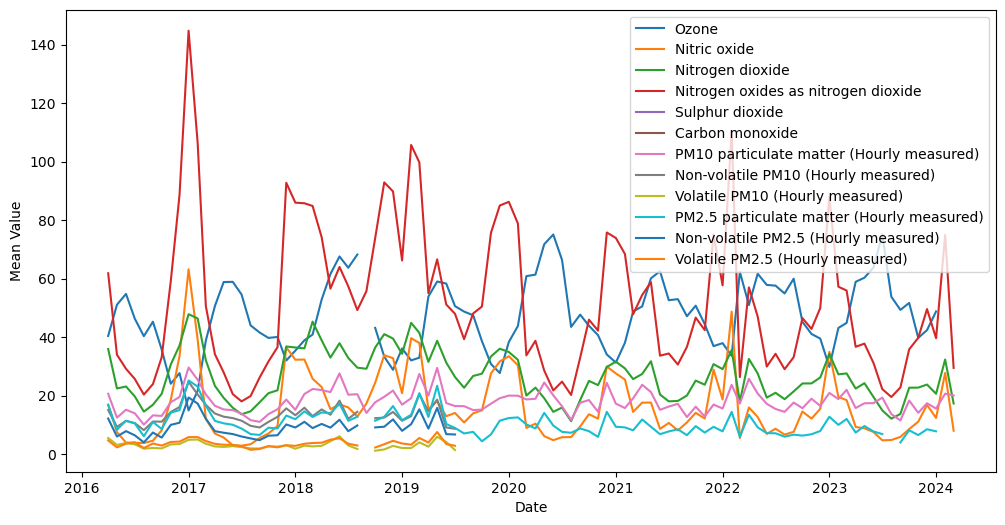

In [53]:
# Iterate over stations and create separate plots
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
        plt.plot(df_after['Date'], 
             df_after[(pollutant, 'mean')], 
             label=pollutant)
    
    
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

### Generatinf final file

In [54]:
df_after.to_csv('AP data - Final.csv', index=False)